In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [6]:
s_columns = ["rango_edad","tipo_inst_2","jornada","tipo_plan_carr","region_sede","nivel_carrera_2","requisito_ingreso", \
    "vigencia_carrera","area_conocimiento","acreditada_carr","acreditada_inst","anio_ing_carr_ori","sem_ing_carr_ori", \
    "anio_ing_carr_act","sem_ing_carr_act",\
    "dur_total_carr", \
    "valor_matricula","valor_arancel"]
# Saqué "nomb_inst", "nomb_carrera", "dur_estudio_carr","dur_proceso_tit"

path_to_2015 = "../Data/2015.csv" # Hay que agregar el de cada uno.
df = pd.read_csv(path_to_2015) 
select = df.loc[:, s_columns]
all_dict = {}
for column in select.select_dtypes('object'):
    all_dict[column] = {value:i+1 for i, value in enumerate(select[column].unique()) if value is not np.nan}

print(all_dict)
all_dict["rango_edad"] = {'15 a 19 años':1,'20 a 24 años':2, '35 a 39 años':3, '25 a 29 años':4, '30 a 34 años':5, '40 y más años':6}
all_dict["nivel_carrera_2"] = {'Carreras Técnicas':1, 'Carreras Profesionales':2, 'Magister':3, 'Postítulo':4, 'Doctorado':5}
all_dict["acreditada_carr"] = {"NO ACREDITADA":0, "ACREDITADA":1}
all_dict["acreditada_inst"] = {"NO ACREDITADA":0, "ACREDITADA":1}

{'rango_edad': {'20 a 24 años': 1, '15 a 19 años': 2, '35 a 39 años': 3, '25 a 29 años': 4, '30 a 34 años': 5, '40 y más años': 6}, 'tipo_inst_2': {'Universidades Privadas': 1, 'Universidades CRUCH': 2, 'Institutos Profesionales': 3, 'Centros de Formación Técnica': 4}, 'jornada': {'Diurno': 1, 'Vespertino': 2, 'A Distancia': 3, 'Otro': 4, 'Semipresencial': 5}, 'tipo_plan_carr': {'Plan Regular': 1, 'Plan Regular de Continuidad': 2, 'Plan Especial': 3}, 'region_sede': {'Metropolitana': 1, 'Coquimbo': 2, 'Tarapacá': 3, 'Arica y Parinacota': 4, 'Valparaíso': 5, 'Ñuble': 6, 'Antofagasta': 7, 'Atacama': 8, 'Biobío': 9, "Lib. Gral B. O'Higgins": 10, 'La Araucanía': 11, 'Maule': 12, 'Los Lagos': 13, 'Magallanes': 14, 'Los Ríos': 15, 'Aysén': 16}, 'nivel_carrera_2': {'Carreras Profesionales': 1, 'Carreras Técnicas': 2, 'Magister': 3, 'Postítulo': 4, 'Doctorado': 5}, 'requisito_ingreso': {'Educación Media': 1, 'Licenciatura': 2, 'Título Profesional': 4, 'Técnico de Nivel Superior': 5, 'Magíster'

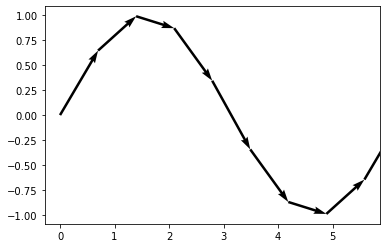

In [35]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)

plt.figure()
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)

n° de instancias:  982620


d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


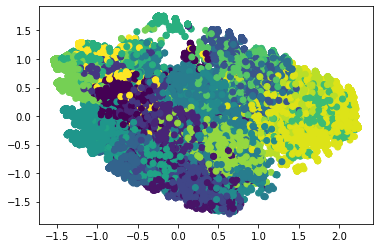

n° de instancias usadas:  100000
Silhouete del espacio PCA con KMeans Clustering	 0.004043822594327057
Silhouette del esapcio one-hot con KMeans Clustering	 -0.003553166200964679

n° de instancias:  1066343


d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


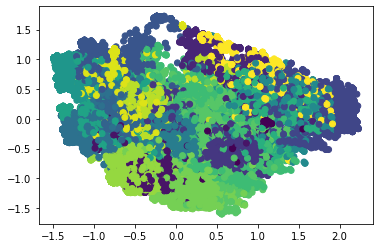

n° de instancias usadas:  100000
Silhouete del espacio PCA con KMeans Clustering	 0.023504681842363612
Silhouette del esapcio one-hot con KMeans Clustering	 -0.004967844495930933

n° de instancias:  1124233


d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


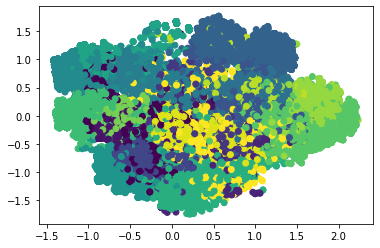

n° de instancias usadas:  100000
Silhouete del espacio PCA con KMeans Clustering	 0.057057903155761966
Silhouette del esapcio one-hot con KMeans Clustering	 -0.004893416858297857

n° de instancias:  1184371


d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


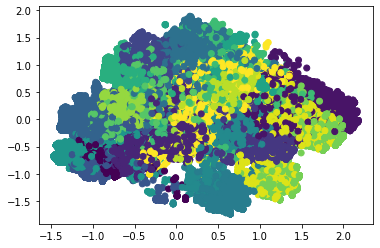

n° de instancias usadas:  100000
Silhouete del espacio PCA con KMeans Clustering	 0.07330796857655858
Silhouette del esapcio one-hot con KMeans Clustering	 -0.0036301924013482307

n° de instancias:  1215130


d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


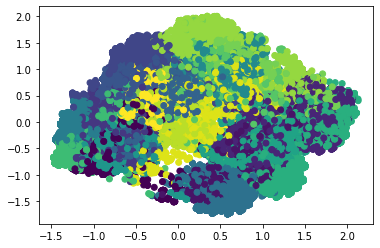

n° de instancias usadas:  100000
Silhouete del espacio PCA con KMeans Clustering	 -0.019401222637101496
Silhouette del esapcio one-hot con KMeans Clustering	 -0.003447765409558845

n° de instancias:  1233043


d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


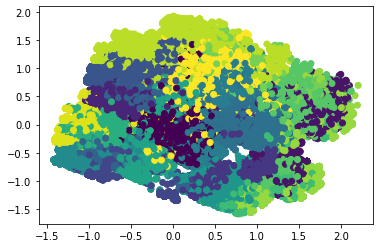

n° de instancias usadas:  100000
Silhouete del espacio PCA con KMeans Clustering	 0.029402792491077776
Silhouette del esapcio one-hot con KMeans Clustering	 -0.004247353911465496

n° de instancias:  1247178


d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


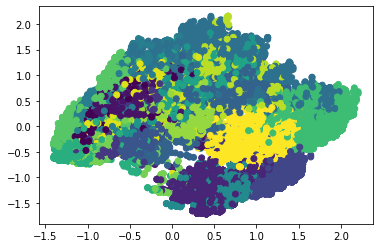

n° de instancias usadas:  100000
Silhouete del espacio PCA con KMeans Clustering	 0.012282067667276292
Silhouette del esapcio one-hot con KMeans Clustering	 -0.0038827324776701463



d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


n° de instancias:  1248293


d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


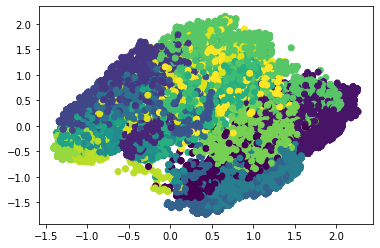

n° de instancias usadas:  100000
Silhouete del espacio PCA con KMeans Clustering	 0.01787482079205911
Silhouette del esapcio one-hot con KMeans Clustering	 -0.0034466024538679935

n° de instancias:  1262336


d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


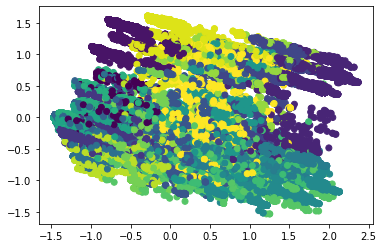

n° de instancias usadas:  100000
Silhouete del espacio PCA con KMeans Clustering	 -0.028651638973192693
Silhouette del esapcio one-hot con KMeans Clustering	 -0.0035583852853769905

n° de instancias:  1268504


d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


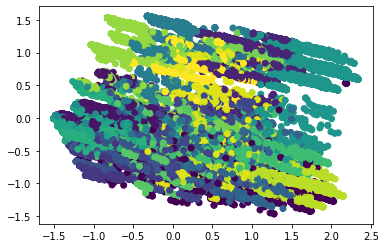

n° de instancias usadas:  100000
Silhouete del espacio PCA con KMeans Clustering	 0.0024793394969702164
Silhouette del esapcio one-hot con KMeans Clustering	 -0.0034558829491022213

[-0.69544305  0.99589087 -0.53614092 -0.90336734 -0.78623481  0.08897517
 -0.85952173  0.68193813 -0.87592301]


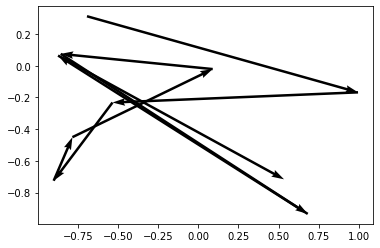

[-0.04433538 -0.37586109 -0.51708334  1.57205434  0.83212157  1.66856251
 -0.54539495  1.74151604 -0.53306711]


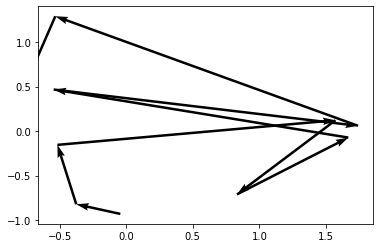

[-0.11870555  0.76479052  0.89926001 -0.2819828   1.35989984 -0.63810214
  0.55042444 -0.36249892  1.72024084]


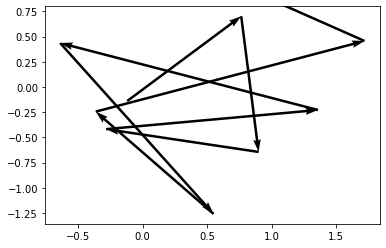

[-0.64144502  0.46798437  0.40932423  1.04889081 -0.9253763   0.69075231
 -0.67543051 -0.37004358 -0.97026904]


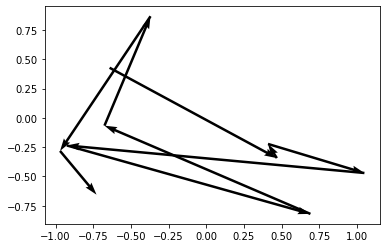

[-0.04232594  1.61909409 -0.39936674 -0.38578035 -0.49866364 -0.82782659
  1.30728661 -0.95897806  1.05499358]


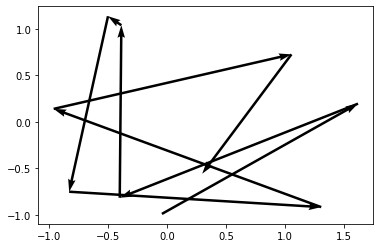

[ 1.01296975 -0.94467997  0.99744548 -0.85754206 -0.63011043 -0.63589863
 -0.41683721  0.20219424  0.1725506 ]


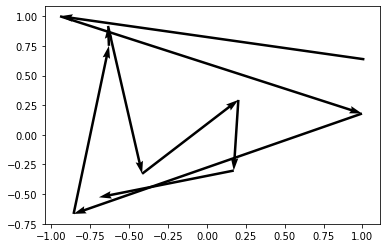

[-0.58570071 -0.70162583  0.82138139 -1.1139002  -0.15998005 -0.66504371
  0.44987622  0.68002754 -1.04855453]


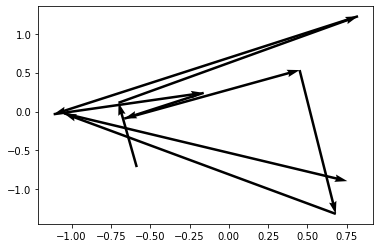

[ 1.08447759 -1.03122287  1.03722618  0.12846832  0.54563784  0.97166395
  0.72356944 -0.45232984 -0.74471099]


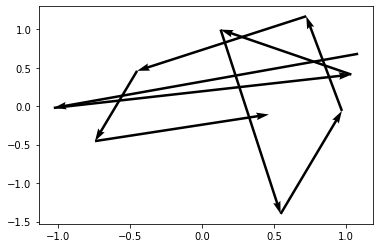

[ 0.40966665 -0.05739528 -0.33593587  0.55349176 -1.21386406  0.54201294
 -0.70207576  0.96903736  0.87467799]


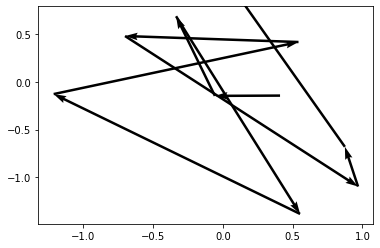

[ 0.30699797  1.31447369 -1.13129834  0.66935954  0.6221834  -1.1067523
  0.64728485 -0.78028596  1.12476785]


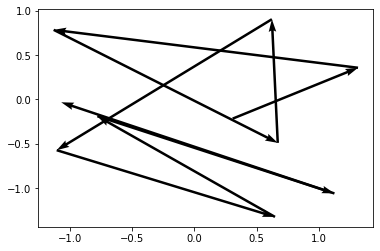

[-0.91392571 -1.30985644 -0.69863848 -1.20855717 -0.8709036   0.63959967
 -0.00497799 -0.82405312  0.5704761 ]


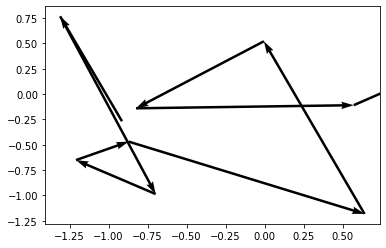

[-0.32096119 -0.92972609 -0.85468354  0.78352656  1.07235007 -0.29684894
  0.42722142 -0.99376762 -0.98266167]


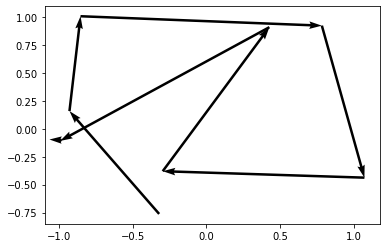

[-0.98188622  1.13846907  0.26372573 -0.62636519  1.54992232 -0.9716808
 -1.11544636  0.57377977 -0.89705865]


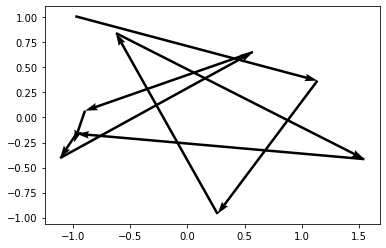

[ 1.62971214  0.48184501 -1.02938607  0.4901782  -1.05920845  1.08653661
  1.73325982  0.49764339  0.72329477]


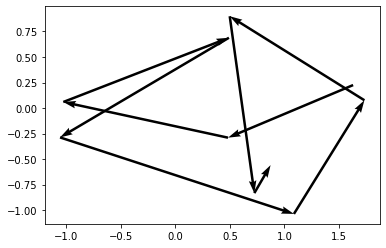

[ 0.88583932  0.42147901  1.58344452 -0.41456258  0.41505086  1.51761173
 -1.0673181   0.92603909  0.58261108]


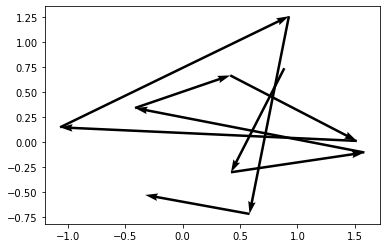

[-1.28450993  0.19604617 -0.59425035  1.61569525  0.95008079  0.92700101
 -0.85603376  1.12081718 -0.43495816]


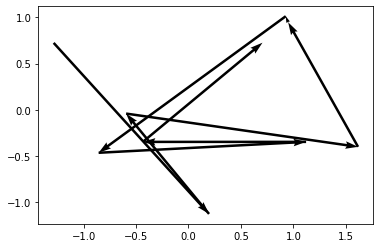

[ 0.49633654 -0.54905994  1.66414798 -0.62233015  0.3993654   1.41990264
  0.12587338 -1.20890777  0.85477794]


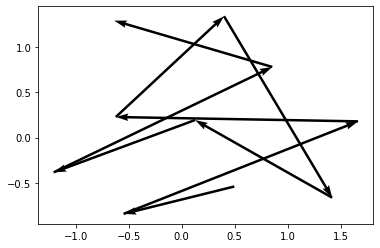

[ 1.45907057 -0.35162749  0.96969392  0.48344871 -0.0277853  -0.14471702
  0.46867909 -0.94668073 -0.74946327]


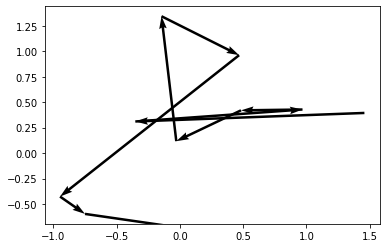

[ 1.59634116 -0.73176872  0.26789249  1.41598666  0.3788496  -1.14352658
 -0.6939551  -0.01997074  0.32739062]


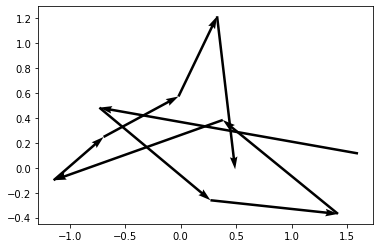

[-0.72349773  1.14118176  0.46476706  0.4364762  -0.35311017  0.43269663
  1.06721218  0.52561774  0.5227295 ]


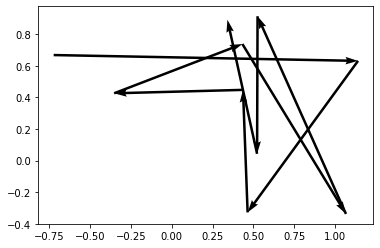

'\nfor centroid in range(n_clus):\n    last = (0,0)\n    for x,y in centroid_coord[:,centroid,:]:\n        plt.arrow(last[0],last[1], x-last[0], y-last[1], width=w, head_width=4*w)\n        last = (x,y)\n    plt.show()\n'

In [42]:
used = 100000
n_clus = 20 # Ideal: 20
np.random.seed(10)
n_years = 10
ndims = 2

select_columns = s_columns.copy()
for nn in ['requisito_ingreso', 'vigencia_carrera']:
    try: select_columns.remove(nn)
    except: pass
    try: all_dict.pop(nn)
    except: pass

centroid_coord = np.zeros((n_years, n_clus, ndims))
for i in range(n_years):
    path = f"../Data/201{i}.csv" # Hay que agregar el de cada uno.
    df = pd.read_csv(path, nrows=None)
    df = df.loc[:, select_columns]
    for attribute in all_dict:
        df[attribute] = df[attribute].map(all_dict[attribute])
    df.iloc[:,:-2] = df.iloc[:,:-2].convert_dtypes(np.int32)
    df = pd.get_dummies(df, prefix=select_columns[:-2], columns=select_columns[:-2])

    print("n° de instancias: ", len(df))
    sample = np.random.choice(len(df), used)
    kmean = KMeans(n_clusters=n_clus).fit(df.iloc[sample,2:])

    pca = PCA(n_components=ndims, random_state=1).fit(df.iloc[sample,2:])
    new_space = pca.transform(df.iloc[sample,2:])
    centroid_coord[i, :, :] = pca.transform(kmean.cluster_centers_)
    plt.scatter(new_space[:, 0], new_space[:, 1], c=kmean.labels_)
    plt.show()
    
    print("n° de instancias usadas: ", used)
    print("Silhouete del espacio PCA con KMeans Clustering\t", silhouette_score(new_space, kmean.labels_))
    print("Silhouette del esapcio one-hot con KMeans Clustering\t", silhouette_score(df.iloc[:used,2:], kmean.labels_))
    print()

for centroid in range(n_clus):
    a = centroid_coord[:-1,centroid,:]
    print(a[:,0])
    b = centroid_coord[1:,centroid,:]
    plt.quiver(a[:,0], a[:,1], b[:,0]-a[:,0], b[:,1]-a[:,1], scale_units='xy', angles='xy', scale=1, c=list(range(n_years)))
plt.show()

"""
w = 0.01
for centroid in range(n_clus):
    last = (0,0)
    for x,y in centroid_coord[:,centroid,:]:
        plt.arrow(last[0],last[1], x-last[0], y-last[1], width=w, head_width=4*w)
        last = (x,y)
    plt.show()
"""